**Andrea Natania - PYTN-KS17-04**

# Import Packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.diagnostic import normal_ad

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style='darkgrid')

# Import Data

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


1. age
2. job : Type of Job
3. marital : Marital Status
4. education
5. default : has credit in default?
6. housing : has housing loan?
7. loan : has personal loan?
8. contact : contact communicatikon type
9. month : last contact month of year
10. day_of_week : last contact day of the week
11. duration : last contact duration
12. campaign : number of contacts performed during this campaign and for this client
13. pdays : number of days that passed by after the client was last contacted from a previous campaign
14. previous : number of contacts performed before this campaign and for this client
15. poutcome : outcome of the previous marketing campaign
16. emp.var.rate = employment variation rate - quarterly indicator (numeric)
17. cons.price.idx = consumer price index - monthly indicator (numeric)
18. cons.conf.idx : consumer confidence index - monthly indicator (numeric)
19. euribor3m : euribor 3 month rate - daily indicator (numeric)
20. nr.employed : number of employees - quarterly indicator (numeric)

**OUTPUT VARIABLE:** </br>
y - Has the client subscribed a term deposit?

# Check Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Check Null Values

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tidak ada data null di dalam dataset ini

# Check duplicated data

In [5]:
df.duplicated().sum()

12

In [6]:
df.drop_duplicates(subset=df.columns, keep='last', inplace=True)
df.shape

(41176, 21)

Karena ada 12 Null values, maka 12 data tersebut dibuang

#  Drop Unnecessary COlumm

In [7]:
df.drop(['day_of_week','month'], axis=1, inplace=True)

# Exploratory Data Analysis

In [8]:
eda = df[df['y']=='yes'][['job','y']]
eda

,job,y
75,blue-collar,yes
83,entrepreneur,yes
88,technician,yes
129,technician,yes
139,blue-collar,yes
...,...,...
41174,retired,yes
41178,retired,yes
41181,admin.,yes
41183,retired,yes


In [9]:
eda.job.value_counts()

admin.           1351
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64

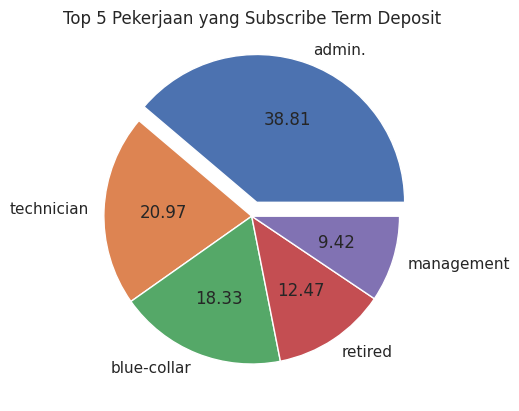

In [10]:
explode=[0.1,0,0,0,0]
eda.job.value_counts().head(5).plot(kind='pie', autopct='%.2f', explode = explode)
plt.ylabel('')
plt.title('Top 5 Pekerjaan yang Subscribe Term Deposit', bbox={'facecolor':'1', 'pad':5})
plt.show()

Pekerjaan yang paling banyak subscribe term deposit adalah admin dan yang kedua terbanyak adalah technician.

In [11]:
eda1 = df[['loan','y']].groupby(['loan','y']).agg({'loan':'count'})
eda1

loan
loan    y         
no      no   30089
        yes   3849
unknown no     883
        yes    107
yes     no    5565
        yes    683

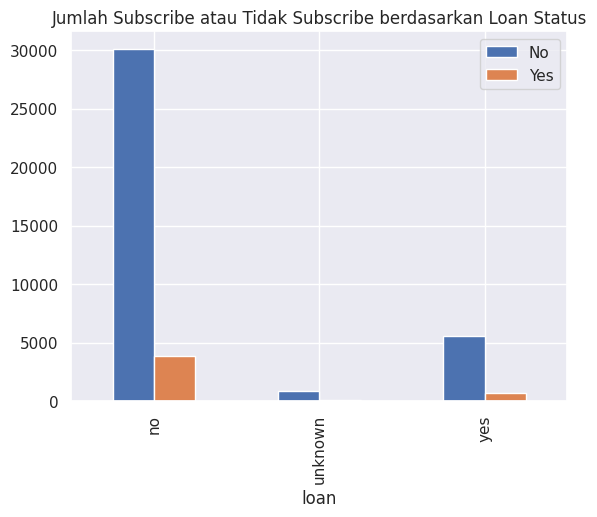

In [12]:
ax = eda1.unstack(level=1).plot(kind='bar')
plt.legend(['No','Yes'])
plt.title("Jumlah Subscribe atau Tidak Subscribe berdasarkan Loan Status")
plt.show()

Dapat dilihat bahwa subscriber term deposit terbanyak terdapat pada klien yang tidak memiliki hutang. Namun, yang tidak subscribe term deposit juga terdapat pada orang-orang yang tidak memiliki hutang.

In [13]:
eda2 = df[df['y']=='yes'][['age','y']]
eda2 = eda2.groupby(['age']).agg({'y':'count'}).reset_index()
eda2

,age,y
0,17,2
1,18,12
2,19,20
3,20,23
4,21,29
...,...,...
70,87,1
71,88,9
72,89,2
73,92,3


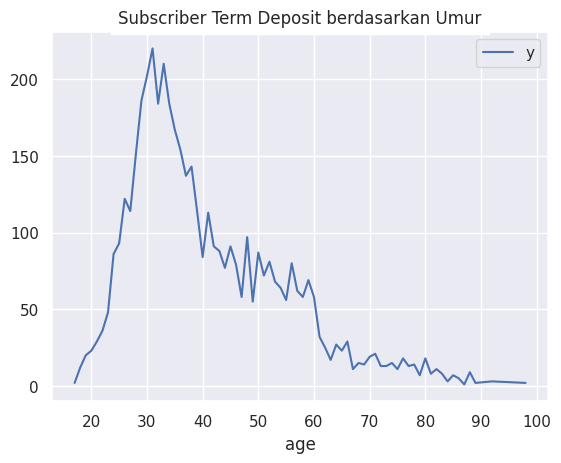

In [14]:
eda2.plot(x='age',y='y' ,kind='line')
plt.ylabel('')
plt.title('Subscriber Term Deposit berdasarkan Umur', bbox={'facecolor':'1', 'pad':5})
plt.show()

Dapat dilihat bahwa subscriber time deposit terbanyak ada di rentang umur 25 hingga 35

# Label Encoding

Merubah data kategorikal menjadi data numerik

In [15]:
label_encoder = preprocessing.LabelEncoder()

In [16]:
# label encoding hanya kolom yang akan digunakan
df['job1']= label_encoder.fit_transform(df['job'])
df['marital1']= label_encoder.fit_transform(df['marital'])
df['education1']= label_encoder.fit_transform(df['education'])
df['default1']= label_encoder.fit_transform(df['default'])
df['housing1']= label_encoder.fit_transform(df['housing'])
df['loan1']= label_encoder.fit_transform(df['loan'])
df['contact1']= label_encoder.fit_transform(df['contact'])
df['poutcome1']= label_encoder.fit_transform(df['poutcome'])
df['y_1']= label_encoder.fit_transform(df['y'])
df.tail()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job1,marital1,education1,default1,housing1,loan1,contact1,poutcome1,y_1
41183,73,retired,married,professional.course,no,yes,no,cellular,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,5,1,5,0,2,0,0,1,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,1,5,0,0,0,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,5,1,6,0,2,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,9,1,5,0,0,0,0,1,1
41187,74,retired,married,professional.course,no,yes,no,cellular,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,5,1,5,0,2,0,0,0,0


# Split Data

In [17]:
train, test = train_test_split(df, test_size=0.25, random_state=11)
train_index = train.index
test_index = test.index

In [18]:
X_train = train[['age','job1','marital1','education1','default1','cons.price.idx',
                 'housing1','loan1','contact1','duration','campaign','pdays',
                 'previous','poutcome1']]
y_train = train[['y_1']]

In [19]:
X_test = test[['age','job1','marital1','education1','default1','cons.price.idx',
               'housing1','loan1','contact1','duration','campaign','pdays',
               'previous','poutcome1']]
y_test = test[['y_1']]

# Scale Data

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [21]:
model_log_reg = LogisticRegression(solver='liblinear', random_state=0)

In [22]:
model_log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [23]:
print(model_log_reg.intercept_)
print(model_log_reg.coef_)

[-2.7425271]
[[ 0.18393139  0.0542478   0.14972513  0.13962834 -0.31800114 -0.33621664
  -0.00465765 -0.04824866 -0.2696139   1.0635626  -0.19351235 -0.26002475
   0.26332369  0.21526127]]


In [24]:
log_reg_train_accuracy = model_log_reg.score(X_train, y_train)
log_reg_train_accuracy

0.90363318437925

### Confusion Matrix

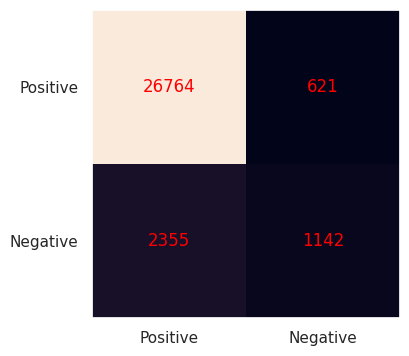

In [25]:
cm = confusion_matrix(y_train, model_log_reg.predict(X_train))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Confusion matrix di atas menunjukkan bahwa True Positive lebih besar dari False Positive. Namun, False Negative lebih besar dari True Negative. Maka dari itu model ini masih dapat di tingkatkan lagi.

### Classification Report

In [26]:
print(classification_report(y_train, model_log_reg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27385
           1       0.65      0.33      0.43      3497

    accuracy                           0.90     30882
   macro avg       0.78      0.65      0.69     30882
weighted avg       0.89      0.90      0.89     30882



### Predict Testing Data

In [27]:
y_pred = model_log_reg.predict(X_test)

In [28]:
log_reg_test_accuracy = model_log_reg.score(X_test, y_test)
log_reg_test_accuracy

0.9065475034000389

In [29]:
compared = pd.DataFrame({'Keterangan':['Training Data','Testing Data'],
                         'Accuracy':[log_reg_train_accuracy, log_reg_test_accuracy]})
print('Karena testing data memiliki akurasi yang lebih tinggi dari training data, maka model ini termasuk overfitting')
compared

Karena testing data memiliki akurasi yang lebih tinggi dari training data, maka model ini termasuk overfitting


,Keterangan,Accuracy
0,Training Data,0.903633
1,Testing Data,0.906548


Akurasi dari training data menggunakan logistic regressiokn adalah sebesar 90.36% sedangkan akurasi dari testing data adalah sebesar 90.65%

# KNN (K-Nearest Neighbors)

In [30]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test['y_1'].to_list()))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

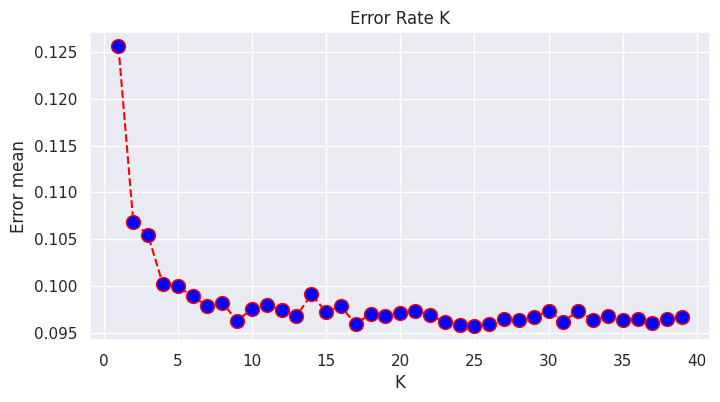

In [31]:
plt.figure(figsize=(8,4))
plt.plot(range(1,40), error, color='red',linestyle='dashed',
         marker='o', markerfacecolor='blue',markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')
plt.show()

In [32]:
error.index(min(error))+1

25

Model menggunakan k dengan error terkecil diatas

In [33]:
knn = KNeighborsClassifier(n_neighbors=error.index(min(error))+1)
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

In [34]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
print('Accuracy:', knn_accuracy)

Accuracy: 0.9043131921507674


Akurasi yang didapatkan menggunakan model KNN dengan k=25 adalah sebesar 90.43%

### Confusion Matrix

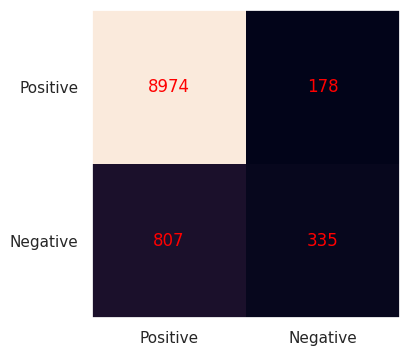

In [36]:
cm = confusion_matrix(y_test, y_pred_knn)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Confusion matrix di atas menunjukkan bahwa True Positive lebih besar dari False Positive. Namun, False Negative lebih besar dari True Negative. Maka dari itu model ini masih dapat di tingkatkan lagi.

# SVM (Support Vector Machine)

In [37]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [38]:
y_pred_svm =clf.predict(X_test)
svm_accuracy = metrics.accuracy_score(y_test, y_pred_svm)
print('Accuracy:', svm_accuracy)

Accuracy: 0.8994559937827861


Akurasi yang didapatkan saat menggunakan model SVM adalah sebesar 89.9%

### Confusion Matrix

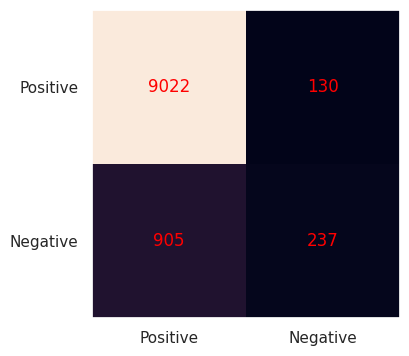

In [39]:
cm = confusion_matrix(y_test, y_pred_svm)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Confusion matrix di atas menunjukkan bahwa True Positive lebih besar dari False Positive. Namun, False Negative lebih besar dari True Negative. Maka dari itu model ini masih dapat di tingkatkan lagi.

# Naive Bayes

In [40]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [41]:
y_pred_gnb = gnb.predict(X_test)

In [42]:
gnb_accuracy = metrics.accuracy_score(y_test, y_pred_gnb)
print('Accuracy:', gnb_accuracy)

Accuracy: 0.875267145910239


Akurasi yang didapatkan saat menggunakan Naive Bayes model adalah sebesar 87.5%

### Confusion Matrix

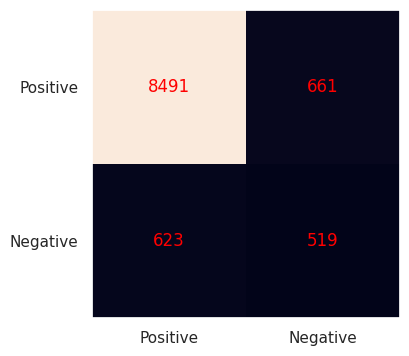

In [43]:
cm = confusion_matrix(y_test, y_pred_gnb)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Confusion matrix di atas menunjukkan bahwa True Positive lebih besar dari False Positive. Namun, False Negative lebih besar dari True Negative. Maka dari itu model ini masih dapat di tingkatkan lagi.

# Decision Tree

In [44]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

In [45]:
y_pred_dt =dt.predict(X_test)

In [46]:
dt_accuracy = metrics.accuracy_score(y_test, y_pred_dt)
print('Accuracy:', dt_accuracy)

Accuracy: 0.8870215659607539


In [47]:
accuracy_dt = []
accuracy_dt.append(dt_accuracy)
for i in range(1,11):
  dt1 = DecisionTreeClassifier(criterion="entropy",max_depth = i)
  dt1 = dt1.fit(X_train, y_train)
  y_pred_dt_1 =dt1.predict(X_test)
  accuracy_dt.append(metrics.accuracy_score(y_test, y_pred_dt_1))
  print('Accuracy Max Depth',i,":", accuracy_dt[i-1])

Accuracy Max Depth 1 : 0.8870215659607539
Accuracy Max Depth 2 : 0.889061589275306
Accuracy Max Depth 3 : 0.8968331066640761
Accuracy Max Depth 4 : 0.90625607149796
Accuracy Max Depth 5 : 0.9060617835632407
Accuracy Max Depth 6 : 0.9084903827472314
Accuracy Max Depth 7 : 0.9080046629104332
Accuracy Max Depth 8 : 0.9121818535068972
Accuracy Max Depth 9 : 0.9123761414416165
Accuracy Max Depth 10 : 0.9081018068777928


Akurasi yang didapatkan dari model Decision Tree tanpa menggunakan max depth adalah sebesear 88.7%. Sedangkan akurasi yang tertinggi saat menggunakan max depth adalah sebesar 91.24%.

### Confusion Matrix

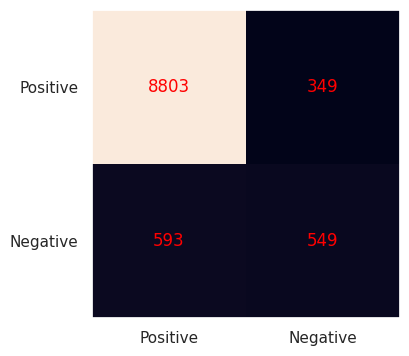

In [48]:
cm = confusion_matrix(y_test, y_pred_dt_1)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Confusion matrix di atas menunjukkan bahwa True Positive lebih besar dari False Positive. Namun, False Negative lebih besar dari True Negative. Maka dari itu model ini masih dapat di tingkatkan lagi.

# Random Forest

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

<ipython-input-49-c1b2e2afa18a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

In [50]:
y_pred_rf = rf.predict(X_test)

In [51]:
rf_accuracy =  metrics.accuracy_score(y_test, y_pred_rf)
print('Accuracy:', rf_accuracy)

Accuracy: 0.9118904216048184


Akurasi yang didapatkan dari model Random forest adalah sebesar 91.19%

### Confusion Matrix

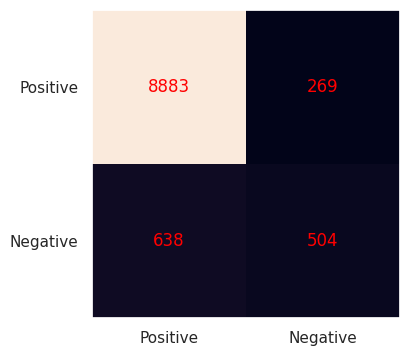

In [52]:
cm = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Confusion matrix di atas menunjukkan bahwa True Positive lebih besar dari False Positive. Namun, False Negative lebih besar dari True Negative. Maka dari itu model ini masih dapat di tingkatkan lagi.

# Comparing model accuracy

In [53]:
compared_model = pd.DataFrame({'Keterangan':['Logistic Regression','KNN (k=19)', 'SVM',
                                            'Decision Tree','Naive Bayes','Random Forest'],
                               'Accuracy':[log_reg_test_accuracy, knn_accuracy,
                                          svm_accuracy, max(accuracy_dt),
                                          gnb_accuracy, rf_accuracy]})
compared_model

,Keterangan,Accuracy
0,Logistic Regression,0.906548
1,KNN (k=19),0.904313
2,SVM,0.899456
3,Decision Tree,0.912376
4,Naive Bayes,0.875267
5,Random Forest,0.911890


Dari hasil comparison di atas, dapat dilihat bahwa Decision tree adalah Model yang akurasinya paling tinggi. Karena itu, akan dilakukan modeling pada data banking full menggunakan decision tree.

# Import data

In [54]:
data = pd.read_csv('bank-additional.csv', sep=';')
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


# Check Data Type

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

# Check Duplicated Data

In [57]:
data.duplicated().sum()

0

Tidak ada data duplikasi sehingga tidak perlu membuang data

# Label Encoding

In [58]:
data['job1']= label_encoder.fit_transform(data['job'])
data['marital1']= label_encoder.fit_transform(data['marital'])
data['education1']= label_encoder.fit_transform(data['education'])
data['default1']= label_encoder.fit_transform(data['default'])
data['housing1']= label_encoder.fit_transform(data['housing'])
data['loan1']= label_encoder.fit_transform(data['loan'])
data['contact1']= label_encoder.fit_transform(data['contact'])
data['poutcome1']= label_encoder.fit_transform(data['poutcome'])
data['y_1']= label_encoder.fit_transform(data['y'])
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job1,marital1,education1,default1,housing1,loan1,contact1,poutcome1,y_1
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1,1,2,0,2,0,0,1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,7,2,3,0,0,0,1,1,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,7,1,3,0,2,0,1,1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,7,1,2,0,1,1,1,1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,1,6,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0,1,1,0,2,2,0,1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0,1,3,0,2,0,1,1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,8,2,3,0,0,0,0,0,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0,1,3,0,0,0,0,1,0


# Split Data

In [59]:
train1, test1 = train_test_split(data, test_size=0.25, random_state=11)
train_index1 = train1.index
test_index1 = test1.index

In [61]:
X_train1 = train1[['age','job1','marital1','education1','default1','cons.price.idx','housing1','loan1','contact1','duration','campaign','pdays','previous','poutcome1']]
y_train1 = train1[['y_1']]


In [62]:
X_test1 = test1[['age','job1','marital1','education1','default1','cons.price.idx','housing1','loan1','contact1','duration','campaign','pdays','previous','poutcome1']]
y_test1 = test1[['y_1']]


# Scale Data

In [63]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Decision Tree

In [64]:
dt2 = DecisionTreeClassifier()
dt2 = dt2.fit(X_train1, y_train1)

In [65]:
y_dt2 =dt2.predict(X_test1)

In [66]:
dt_accuracy1 = metrics.accuracy_score(y_test1, y_dt2)
print('Accuracy:', dt_accuracy1)

Accuracy: 0.8737864077669902


In [67]:
accuracy_dt = []
accuracy_dt.append(dt_accuracy)
for i in range(1,11):
  dt1 = DecisionTreeClassifier(criterion="entropy",max_depth = i)
  dt1 = dt1.fit(X_train, y_train)
  y_pred_dt_1 =dt1.predict(X_test)
  accuracy_dt.append(metrics.accuracy_score(y_test, y_pred_dt_1))
  print('Accuracy Max Depth',i,":", accuracy_dt[i-1])

Accuracy Max Depth 1 : 0.8870215659607539
Accuracy Max Depth 2 : 0.889061589275306
Accuracy Max Depth 3 : 0.8968331066640761
Accuracy Max Depth 4 : 0.90625607149796
Accuracy Max Depth 5 : 0.9060617835632407
Accuracy Max Depth 6 : 0.9084903827472314
Accuracy Max Depth 7 : 0.9081018068777928
Accuracy Max Depth 8 : 0.9118904216048184
Accuracy Max Depth 9 : 0.9120847095395376
Accuracy Max Depth 10 : 0.907810374975714


Tingkat akurasi dari model ini adalah sebesar 91.2% dengan max depth 9.

### Confusion Matrix

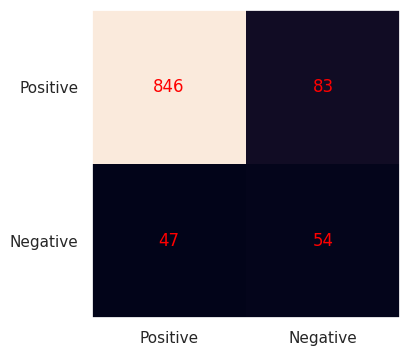

In [69]:
cm = confusion_matrix(y_test1, y_dt2)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Confusion Matrix diatas menunjukkan bahwa True Positive lebih besar dari False Positive dan True Negative lebih besar dari False Negative. Karena itu model sudah cukup optimal.

# Kesimpulan

Model Decision Tree adalah model yang paling akurat untuk memprediksi target karena memiliki akurasi yang paling tinggi dibandingkan metode yang lainnya. Selain itu, model decision tree juga cocok untuk mempredisksi data ini karena hasil confusion matrix menunjukkan bahwa True Positive dan True Negative lebih besar daripada False Positive dan False Negative secara berurutan.